# Install Dependencies 

In [5]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import tensorflow as tf
from tensorflow.keras import models, layers, regularizers, Input 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    EarlyStopping, 
    LearningRateScheduler, 
    ReduceLROnPlateau, 
    ModelCheckpoint, 
    TensorBoard
)

from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE

# Load Dataset

In [6]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
print(f"Columns: {df.shape[1]} Rows: {df.shape[0]}")

Columns: 31 Rows: 284807


In [54]:
vc = df['Class'].value_counts().to_frame().reset_index()
vc['percent'] = vc["count"].apply(lambda x : round(100*float(x) / len(df), 2))
vc

,Class,count,percent
0,0,284315,99.83
1,1,492,0.17


# Autoencoders for Anomaly Detention

## Data Preprocessing

In [7]:
df = df.drop(['Time', 'Amount'], axis=1) # Drop Time and Amount columns

# Split data into fraud and non-fraud
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

## Train-Test Split

In [8]:
train_sample = 200000

# Shuffle data
non_fraud = non_fraud.sample(frac=1).reset_index(drop=True)

# Split data for training and testing 
X_train = non_fraud[:train_sample].drop(columns=['Class'], axis=1)
X_test = pd.concat([non_fraud[train_sample:], fraud]).sample(frac=1).reset_index(drop=True)

In [9]:
# Split data into training and validation sets 
X_train, X_valid = train_test_split(X_train, test_size=0.2, random_state=42)
X_test, y_test = X_test.drop('Class', axis=1).values, X_test.Class.values

## Normalization and Standardization Pipeline

In [10]:
pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', MinMaxScaler())])

# Learns parameters for scaling from training data; not on validation data because as model should only learn from the training data
pipeline.fit(X_train)

# Apply the learned params on both the training data and validation data to make it same scale
X_train_transformed = pipeline.transform(X_train)
X_valid_transformed = pipeline.transform(X_valid)

## Build Autoencoder Model

In [59]:
from tensorflow.keras.models import Sequential

input_dim = X_train_transformed.shape[1] # Dimension is number of features
batch_size = 256
epochs = 100
learning_rate = 0.001

autoencoder = Sequential([
    # Encoder
    layers.Dense(128, activation='relu', input_shape=(input_shape,)),
    layers.Dense(64, activation='relu'),
    
    # Latent space
    layers.Dense(32, activation='relu'),
    
    # Decoder
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    
    # Ouput 
    layers.Dense(input_dim, activation='sigmoid')
])

autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
autoencoder.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 128)            │         3,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,092 (109.73 KB)

 Trainable params: 28,092 (109.73 KB)

 Non-trainable params: 0 (0.00 B)

## Callbacks

In [60]:
from datetime import datetime

# Path for every run under logs directory 
dt = datetime.now().strftime('%Y%m%d%H%M')
log_subdir = f'{dt}_batch{batch_size}_layers{len(autoencoder.layers)}'

early_stop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  
    factor=0.5,          
    patience=5,          
    min_lr=0.00001,      
    verbose=1            
)

save_model = ModelCheckpoint(
    filepath='autoencoder_best_weights.keras',
    save_best_only=True,
    monitor='val_loss',
    verbose=0,
    mode='min'
)

tensorboard = TensorBoard(
    log_dir=f'logs/{log_subdir}',
    update_freq='batch', 
)

## Training

In [61]:
history = autoencoder.fit(
    X_train_transformed, X_train_transformed,# Input and target both the transformed training data for reconstruction
    shuffle=True, 
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stop, reduce_lr, save_model, tensorboard],
    validation_data=(X_valid_transformed, X_valid_transformed),
    verbose=1
)

autoencoder.save('autoencoder_model.keras')

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0110 - val_loss: 0.0021
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0018 - val_loss: 8.9815e-04
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.8819e-04 - val_loss: 5.1323e-04
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.6799e-04 - val_loss: 3.6522e-04
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.4724e-04 - val_loss: 2.9948e-04
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.8754e-04 - val_loss: 2.6238e-04
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.4596e-04 - val_loss: 2.1741e-04
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.1927e-04 - val_loss: 1.9794e-04
Epoch 9/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.9660e-04 - val_loss: 1.9950e-04
Epoch 10/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.7943e-04 - val_loss: 1.7029e-04
Epoch 11/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss:

In [64]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Evaluate Reconstruction

In [3]:
autoencoder = tf.keras.models.load_model('/kaggle/input/transaction_fraud_detection/keras/default/1/autoencoder_model.keras')
autoencoder.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 128)            │         3,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,278 (329.21 KB)

 Trainable params: 28,092 (109.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 56,186 (219.48 KB)

In [22]:
# Apply normalization and scaling on test data
X_test_transformed = pipeline.transform(pd.DataFrame(X_test, columns=X_train.columns.tolist()))

# Evaluate the autoencoder on the test data
test_loss = autoencoder.evaluate(X_test_transformed, X_test_transformed, verbose=1)
print(f'Test Loss: {test_loss:.4f}')

2651/2651 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.0268e-04
Test Loss: 0.0003


In [12]:
reconstructions = autoencoder.predict(X_test_transformed)
reconstruction_errors = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)
threshold = np.percentile(reconstruction_errors, 95) 
anomalies = reconstruction_errors > threshold
clean = reconstruction_errors[y_test==0]
fraud = reconstruction_errors[y_test==1]

2651/2651 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [65]:
# Pass the transformed test set through the autoencoder to get the reconstructed result
reconstructions = autoencoder.predict(X_test_transformed)
print(reconstructions)

2651/2651 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
[[0.86355513 0.5969623  0.20109306 ... 0.36557606 0.6604139  0.47472182]
 [0.8056869  0.34687567 0.51540107 ... 0.5166484  0.6794075  0.4628618 ]
 [0.24347027 0.30136588 0.5586932  ... 0.37662652 0.67945576 0.45793316]
 ...
 [0.81229275 0.44694078 0.2368198  ... 0.40897942 0.6718435  0.45973143]
 [0.7476396  0.6673689  0.49746904 ... 0.35372874 0.6759173  0.47694534]
 [0.69588083 0.38398936 0.41417181 ... 0.38530913 0.67047536 0.48413274]]


In [66]:
# Mean squared error for each sample to get reconstruction loss
reconstruction_errors = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)
print(reconstruction_errors) 

[4.73423934e-05 1.24662277e-04 1.37806375e-04 ... 8.75715110e-05
 4.08535868e-05 9.69704677e-05]


In [67]:
# Define threshold for anomalies; 95th percentile (95% of reconstruction errors are smaller than the threshold and other 5% are anomalies)
threshold = np.percentile(reconstruction_errors, 95) 

# Array True if sample is anomaly else False
anomalies = reconstruction_errors > threshold
print(anomalies)

[False False False ... False False False]


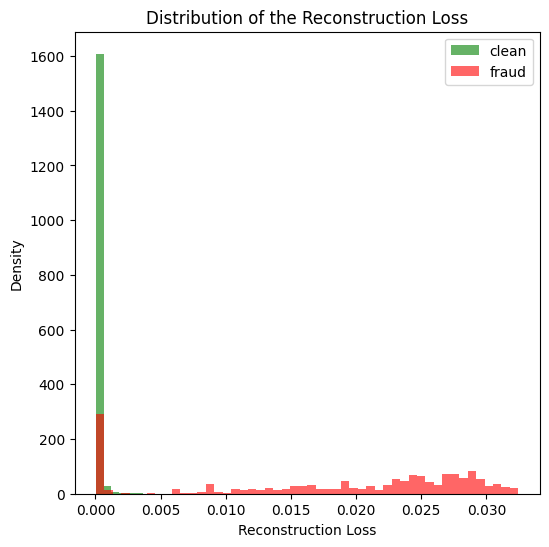

'\n- Low reconstruction errors for clean transactions because the autoencoder trained primarily on non-fraudulent data. \n- High reconstruction errors for fraud transactions with wider spread which shows the autoencoder struggles more with reconstructing fraud to detect anomalies.\n- Overlap with the clean and fraud bars indicates the model struggles to differentiate leading to false negatives.\n'

In [98]:
# Histogram of reconstruction loss for clean and fraud samples
clean = reconstruction_errors[y_test==0]
fraud = reconstruction_errors[y_test==1]

fig, ax = plt.subplots(figsize=(6,6))

ax.hist(clean, bins=50, density=True, label="clean", alpha=.6, color="green")
ax.hist(fraud, bins=50, density=True, label="fraud", alpha=.6, color="red")

ax.set_xlabel("Reconstruction Loss")
ax.set_ylabel("Density")

plt.title("Distribution of the Reconstruction Loss")
plt.legend()
plt.show()

"""
- Low reconstruction errors for clean transactions because the autoencoder trained primarily on non-fraudulent data. 
- High reconstruction errors for fraud transactions with wider spread which shows the autoencoder struggles more with reconstructing fraud to detect anomalies.
- Overlap with the clean and fraud bars indicates the model struggles to differentiate leading to false negatives.
"""

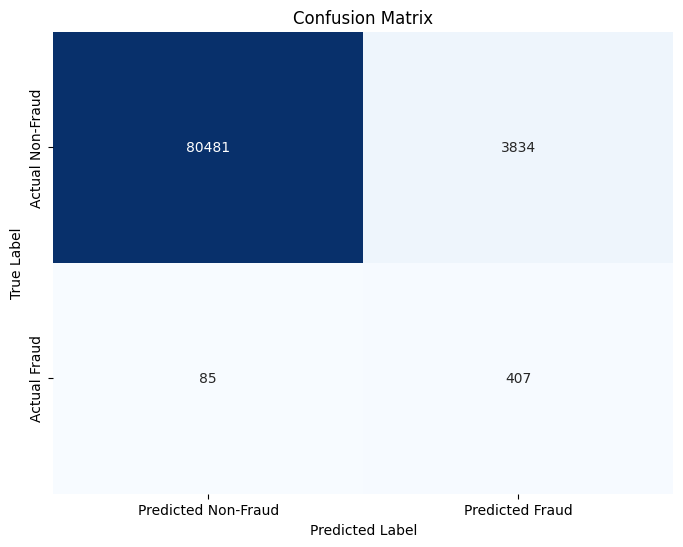

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.95      0.98     84315
       Fraud       0.10      0.83      0.17       492

    accuracy                           0.95     84807
   macro avg       0.55      0.89      0.57     84807
weighted avg       0.99      0.95      0.97     84807



In [14]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, anomalies)

# Create heatmap to display the confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

report = classification_report(y_test, anomalies, target_names=["Non-Fraud", "Fraud"])
print(report)

# Autoencoders for Semi-Supervised Learning

## Undersampling 

In [4]:
# Sample 1000 of non-fraud and all of fraud samples to mitigate class imbalance
non_fraud = df[df['Class'] == 0].sample(1000)
fraud = df[df['Class'] == 1]

# Concatenate fraud and non-fraud samples 
data = pd.concat([non_fraud, fraud]).sample(frac=1).reset_index(drop=True)

# Seperate features and target variable
X = data.drop(['Class'], axis = 1).values
Y = data["Class"].values

## Visualize fraud and non-fraud samples using t-SNE 

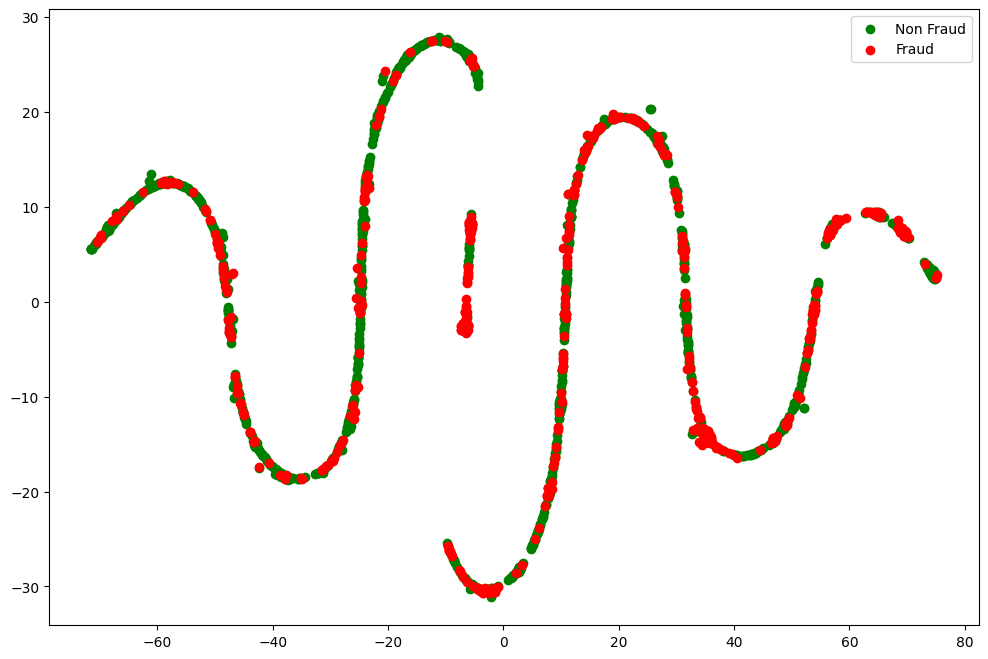

In [20]:
# Plot t-SNE for with 2 components for 2D visualization 
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[y1 == 0, 0], X_t[y1 == 0, 1], marker='o', color='g', label='Non Fraud')
    plt.scatter(X_t[y1 == 1, 0], X_t[y1 == 1, 1], marker='o', color='r', label='Fraud')

    plt.legend(loc='best')
    plt.savefig(name)
    plt.show()
    
tsne_plot(X, Y, "original.png")

## Scaling 

In [5]:
x_scale = MinMaxScaler().fit_transform(X)
x_norm, x_fraud = x_scale[Y == 0], x_scale[Y == 1]

## Build & Train Autoencoder for preprocessing

In [6]:
# Input layer
input_layer = Input(shape=(X.shape[1],))

# Encoder
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)

# Latent space
latent_space = layers.Dense(32, activation='relu')(encoded)

# Decoder
decoded = layers.Dense(64, activation='relu')(latent_space)
decoded = layers.Dense(128, activation='relu')(decoded)

# Output layer
output_layer = layers.Dense(X.shape[1], activation='sigmoid')(decoded)

# Build the autoencoder model
autoencoder_preprocessor = models.Model(inputs=input_layer, outputs=output_layer)
autoencoder_preprocessor.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder_preprocessor.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,606 (111.74 KB)

 Trainable params: 28,606 (111.74 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = autoencoder_preprocessor.fit(
    x_scale, x_scale,  
    epochs=30,
    batch_size=256,
    shuffle=True,
    validation_split=0.2,  
    verbose=1
)

autoencoder_preprocessor.save('autoencoder-preprocessor_model.keras')

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0053 - val_loss: 0.0055
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0051 - val_loss: 0.0053
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0052 - val_loss: 0.0053
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0049 - val_loss: 0.0052
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0052 - val_loss: 0.0051
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0050 - val_loss: 0.0050
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 12/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0046 - val_loss: 0.0046
E

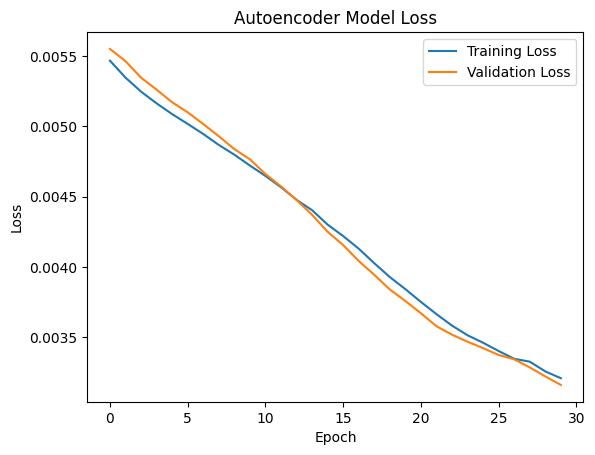

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## Latent Represention from pretrained Autoencoder model

In [14]:
from tensorflow.keras.models import Model

encoding_layers = autoencoder_preprocessor.layers[:3]
latent_representation = Model(
    inputs=autoencoder_preprocessor.input, 
    outputs=encoding_layers[-1].output
)
latent_representation.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,224 (47.75 KB)

 Trainable params: 12,224 (47.75 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compress features as latent representation
norm_latent = latent_representation.predict(x_norm) 
fraud_latent = latent_representation.predict(x_fraud)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


## Visualize latent representations of fraud & non-fraud samples 

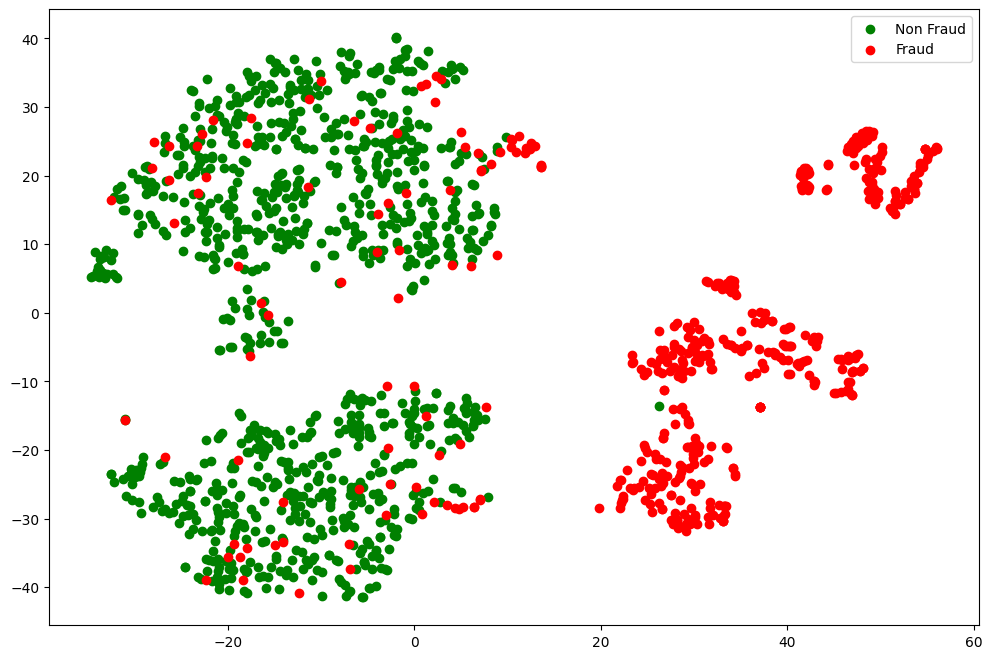

In [18]:
# Combine latent representations
rep_x = np.append(norm_latent, fraud_latent, axis = 0)

# Create labels then combine
y_n = np.zeros(norm_latent.shape[0])
y_f = np.ones(fraud_latent.shape[0])
rep_y = np.append(y_n, y_f)

tsne_plot(rep_x, rep_y, "latent_representation.png")

# Compare fraud vs non-fraud visualizations

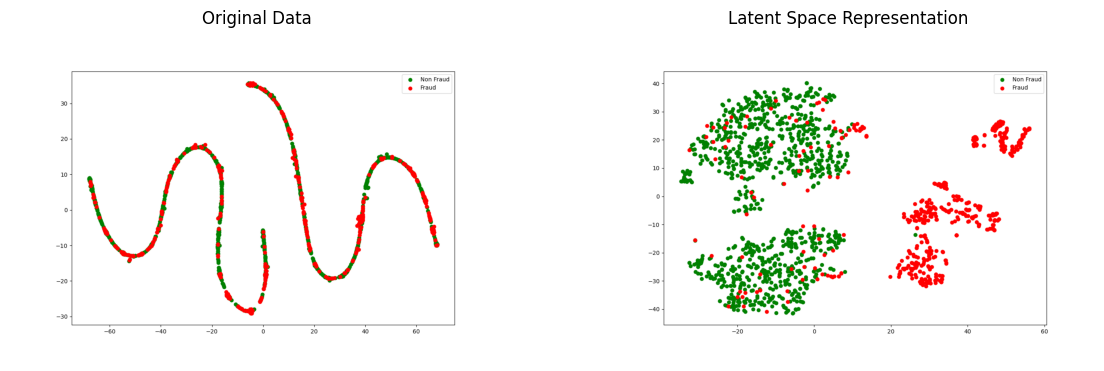

In [26]:
# Load the images
image1 = Image.open("/kaggle/working/original.png")
image2 = Image.open("/kaggle/working/latent_representation.png")

# Display images side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].imshow(image1)
axes[0].set_title("Original Data")
axes[0].axis('off')  

axes[1].imshow(image2)
axes[1].set_title("Latent Space Representation")
axes[1].axis('off')  

plt.show()


# Classifiers

In [27]:
X_train, X_test, y_train, y_test = train_test_split(rep_x, rep_y, test_size=0.25, random_state=42)

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print ("Classification Report: ")
print (classification_report(y_test, y_pred))
print ("Accuracy Score: ", accuracy_score(y_test, y_pred))

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       237
         1.0       0.99      0.82      0.90       136

    accuracy                           0.93       373
   macro avg       0.95      0.91      0.92       373
weighted avg       0.94      0.93      0.93       373

Accuracy Score:  0.9329758713136729


## Support Vector Machine

In [34]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear', max_iter=1000, probability=True)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

print("Classification Report: ")
print(classification_report(y_test, y_pred_svm))
print("Accuracy Score: ", accuracy_score(y_test, y_pred_svm))

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       237
         1.0       0.98      0.84      0.90       136

    accuracy                           0.94       373
   macro avg       0.95      0.91      0.93       373
weighted avg       0.94      0.94      0.93       373

Accuracy Score:  0.935656836461126


## Compare classifier performance

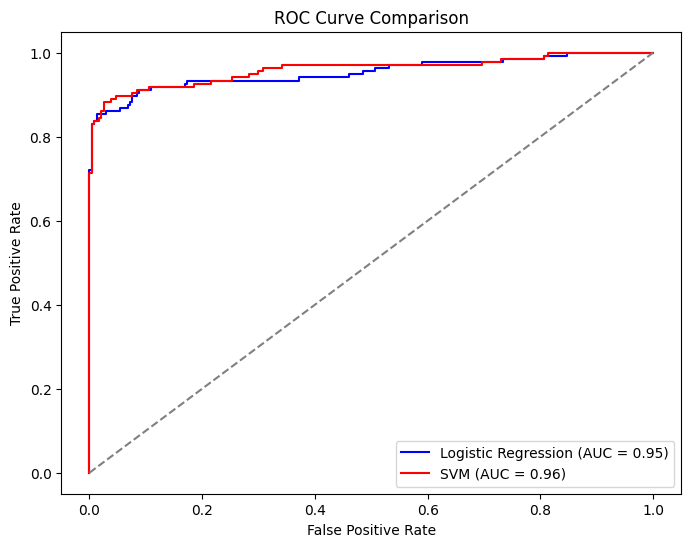

In [36]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Calculate ROC curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_clf.predict_proba(X_test)[:,1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()
